In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
#Aikasarja:
series=[112,118,132,129,121,135,148,148,136,119,104,118,115,126,
        141,135,125,149,170,170,158,133,114,140,145]

#Aikaleimat vuosineljänneksen (Q) välein:
index=pd.date_range('1949-01-01', periods=25, freq='Q')

#Dataframe:
data=pd.DataFrame(series, index=index)
data.columns=['#Passengers']

In [4]:
fit1 = SimpleExpSmoothing(data['#Passengers']).fit()

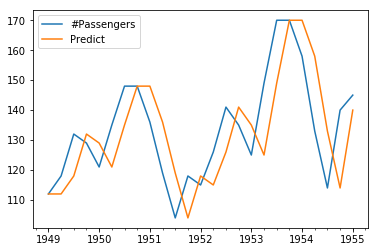

In [5]:
data['Predict']=fit1.fittedvalues

data.plot()

In [6]:
sqrt(mean_squared_error(data['#Passengers'], data['Predict']))


13.947042697288914

In [7]:
mean_absolute_error(data['#Passengers'], data['Predict'])

11.72

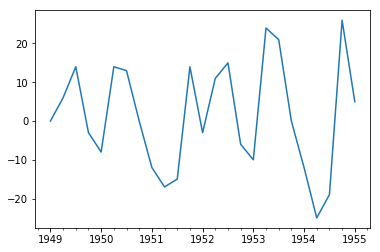

In [8]:
data['Resid']=fit1.resid
data['Resid'].plot()


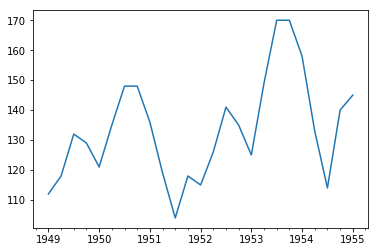

In [10]:
#Ennustettavien ajankohtien aikaleimat:
index=pd.date_range('1959-08-01', periods=4, freq='Q')

#Ennusteet fit1-olion avulla:
datap=pd.DataFrame(fit1.forecast(4), index=index)

#Nimeän ennusteiden sarakkeen:
datap.columns=['Predict']

#Viivakuvio havainnoista:
data['#Passengers'].plot()

#Ennusteet kuvioon:
datap['Predict'].plot()

In [11]:
fit1.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}